In [1]:
import numpy
import scipy.io.wavfile
from scipy.fftpack import dct

# sample_rate, signal = scipy.io.wavfile.read('../data/19700101_000000.WAV')  # File assumed to be in the same directory
sample_rate, signal = scipy.io.wavfile.read("/home/mariussolomes/final_project/summer2019/RealCoo/data/testBird.wav")
# signal = signal[0:int(3.5 * sample_rate)]  # Keep the first 3.5 seconds

In [2]:
# with open('../../spectrogram/spectro/data/test.txt', 'w') as handle:
#     for x in signal:
#         handle.writelines(str(x) + "\n")

In [3]:
pre_emphasis = 0.97
emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

In [4]:
frame_size = 0.025
frame_stride = 0.01

In [5]:
frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = numpy.zeros((pad_signal_length - signal_length))
pad_signal = numpy.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(numpy.int32, copy=False)]

In [6]:
frames *= numpy.hamming(frame_length)
# frames *= 0.54 - 0.46 * numpy.cos((2 * numpy.pi * n) / (frame_length - 1))  # Explicit Implementation **

In [7]:
NFFT = 1024

In [8]:
mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))  # Magnitude of the FFT
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum

In [9]:
nfilt = 40

In [10]:
low_freq_mel = 0
high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = numpy.dot(pow_frames, fbank.T)

In [11]:
filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * numpy.log10(filter_banks)  # dB

In [12]:
from matplotlib import pyplot as plt

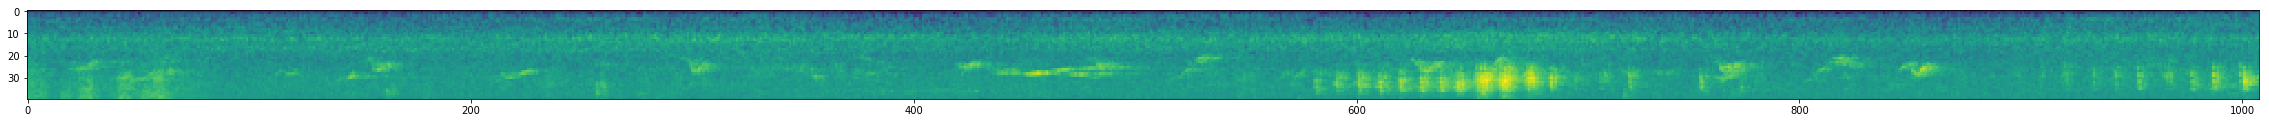

In [13]:
plt.figure(figsize=(40, 20))
plt.imshow(filter_banks.T)
plt.show()

In [14]:
# with open("", "rb") as handle:
with open("/home/mariussolomes/final_project/summer2019/Bela-Spectrogram/data/bird", "r") as handle:
    data = handle.read()

In [15]:
data = [eval(x) for x in data.split()]

In [16]:
filter_banks.shape

(1008, 40)

In [18]:
data = numpy.array(data).reshape(filter_banks.shape)

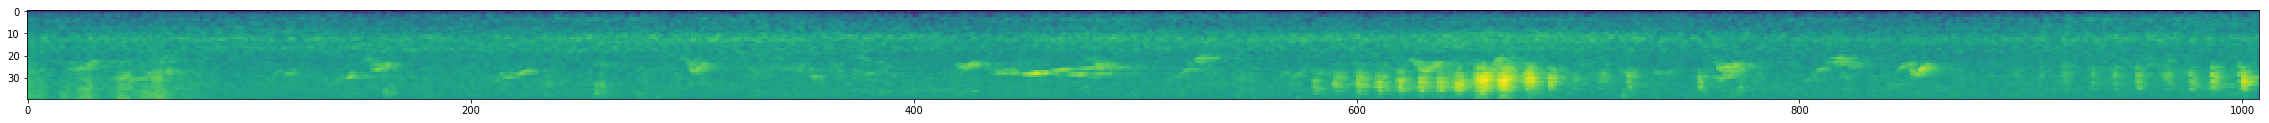

In [19]:
plt.figure(figsize=(40, 20))
plt.imshow(data.T)
plt.show()

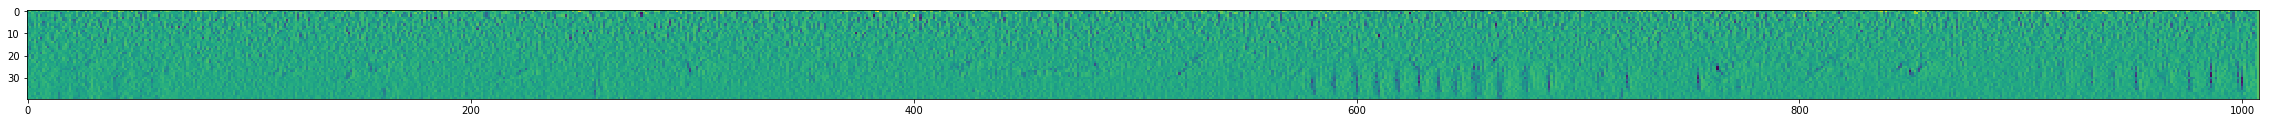

In [20]:
plt.figure(figsize=(40, 20))
plt.imshow(filter_banks.T - data.T)
plt.show()

In [ ]:
# max(abs((data - filter_banks)))

In [ ]:
# filter_banks = data

In [ ]:
num_ceps = 20 # 12

In [ ]:
mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13

In [ ]:
cep_lifter = 22

In [ ]:
(nframes, ncoeff) = mfcc.shape
n = numpy.arange(ncoeff)
lift = 1 + (cep_lifter / 2) * numpy.sin(numpy.pi * n / cep_lifter)
mfcc *= lift  #*

In [ ]:
filter_banks -= (numpy.mean(filter_banks, axis=0) + 1e-8)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.figure(figsize=(50, 5))
plt.imshow(mfcc.T)
plt.show()

In [ ]:
mfcc.shape